In [2]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam



In [21]:
import os

dataset_dir = 'C:/Users/susha/code/Foodie/Indian Food Images/Indian Food Images'

X = []
y = []

# Get class names from folder names
class_names = sorted([
    folder for folder in os.listdir(dataset_dir)
    if os.path.isdir(os.path.join(dataset_dir, folder))
])
print(class_names)

# Go through each class folder
for label, class_name in enumerate(class_names):
    class_path = os.path.join(dataset_dir, class_name)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        if os.path.isfile(img_path) and img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
            X.append(img_path)
            y.append(label)

print(f"Loaded {len(X)} images from {len(class_names)} classes.")


['adhirasam', 'aloo_gobi', 'aloo_matar', 'aloo_methi', 'aloo_shimla_mirch', 'aloo_tikki', 'anarsa', 'ariselu', 'bandar_laddu', 'basundi', 'bhatura', 'bhindi_masala', 'biryani', 'boondi', 'butter_chicken', 'chak_hao_kheer', 'cham_cham', 'chana_masala', 'chapati', 'chhena_kheeri', 'chicken_razala', 'chicken_tikka', 'chicken_tikka_masala', 'chikki', 'daal_baati_churma', 'daal_puri', 'dal_makhani', 'dal_tadka', 'dharwad_pedha', 'doodhpak', 'double_ka_meetha', 'dum_aloo', 'gajar_ka_halwa', 'gavvalu', 'ghevar', 'gulab_jamun', 'imarti', 'jalebi', 'kachori', 'kadai_paneer', 'kadhi_pakoda', 'kajjikaya', 'kakinada_khaja', 'kalakand', 'karela_bharta', 'kofta', 'kuzhi_paniyaram', 'lassi', 'ledikeni', 'litti_chokha', 'lyangcha', 'maach_jhol', 'makki_di_roti_sarson_da_saag', 'malapua', 'misi_roti', 'misti_doi', 'modak', 'mysore_pak', 'naan', 'navrattan_korma', 'palak_paneer', 'paneer_butter_masala', 'phirni', 'pithe', 'poha', 'poornalu', 'pootharekulu', 'qubani_ka_meetha', 'rabri', 'ras_malai', 'ras

In [35]:
len(class_names)

80

In [41]:
# splitting data into train=70% validation=15% and test=15%
X_train, X_temp, y_train, y_temp=train_test_split(X,y,random_state=42,test_size=0.2)
X_val, X_test, y_val, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
#Preprocessing
def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array /= 255.0
    return img_array

def batch_preprocess(image_paths, labels):
    images = np.array([preprocess_image(path) for path in image_paths])
    return images, np.array(labels)

X_train, y_train = batch_preprocess(X_train, y_train)
X_val, y_val = batch_preprocess(X_val, y_val)
X_test, y_test = batch_preprocess(X_test, y_test)

In [43]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape,X_val.shape,y_val.shape)

(3200, 224, 224, 3) (800, 224, 224, 3) (3200,) (800,) (3200, 224, 224, 3) (3200,)


In [44]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(len(class_names), activation='softmax')(x)  # <== This must be 80

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [45]:
model = Model(inputs=base_model.input, outputs=predictions)

In [46]:
model.compile(optimizer=Adam(0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [47]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32
)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 60s 542ms/step - accuracy: 0.1161 - loss: 3.9992 - val_accuracy: 0.5334 - val_loss: 1.8888
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 59s 587ms/step - accuracy: 0.5524 - loss: 1.7737 - val_accuracy: 0.7084 - val_loss: 1.1601
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 60s 600ms/step - accuracy: 0.7350 - loss: 1.0556 - val_accuracy: 0.8703 - val_loss: 0.6423
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 75s 753ms/step - accuracy: 0.8506 - loss: 0.6631 - val_accuracy: 0.9191 - val_loss: 0.4341
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.9182 - loss: 0.4291 - val_accuracy: 0.9719 - val_loss: 0.2475
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.9694 - loss: 0.2563 - val_accuracy: 0.9806 - val_loss: 0.1775
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.9803 - loss: 0.1746 - val_accuracy: 0.9925 - val_loss: 0.1147
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 113s 1s/step - accuracy: 0.9911 - loss: 0.1187 - 

In [48]:

# Evaluation
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")

25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 519ms/step - accuracy: 0.5547 - loss: 1.8375

Test Accuracy: 54.50%


In [49]:
# Saving Model
model.save('food_classifier.h5')

In [66]:
import csv

# Path to your CSV file
csv_file = './indian_food_named_calories.csv'

# Dictionary to store food names and their calories
food_calories = {}

# Open the CSV file and read it
with open(csv_file, mode='r', encoding='utf-8') as file:
    csv_reader = csv.reader(file)
    
    # Skip header if present
    next(csv_reader)
    
    # Iterate through each row and populate the dictionary
    for row in csv_reader:
        food_name = row[0]  # Food name is in the first column
        calories = float(row[1])  # Calories in the second column
        food_calories[food_name] = calories

# Print the dictionary to verify
print(food_calories)


{'adhirasam': 477.75, 'aloo_gobi': 157.44, 'aloo_matar': 285.08, 'aloo_methi': 370.88, 'aloo_shimla_mirch': 247.77, 'aloo_tikki': 441.68, 'anarsa': 381.63, 'ariselu': 143.86, 'bandar_laddu': 378.5, 'basundi': 209.92, 'bhatura': 174.15, 'bhindi_masala': 169.59, 'biryani': 111.38, 'boondi': 303.24, 'butter_chicken': 555.51, 'chak_hao_kheer': 311.54, 'cham_cham': 387.83, 'chana_masala': 360.25, 'chapati': 441.41, 'chhena_kheeri': 214.47, 'chicken_razala': 490.75, 'chicken_tikka': 591.36, 'chicken_tikka_masala': 386.89, 'chikki': 327.03, 'daal_baati_churma': 111.7, 'daal_puri': 381.52, 'dal_makhani': 404.35, 'dal_tadka': 560.02, 'dharwad_pedha': 224.08, 'doodhpak': 467.78, 'double_ka_meetha': 150.94, 'dum_aloo': 435.03, 'gajar_ka_halwa': 387.69, 'gavvalu': 239.29, 'ghevar': 282.54, 'gulab_jamun': 471.93, 'imarti': 192.95, 'jalebi': 235.22, 'kachori': 497.3, 'kadai_paneer': 209.15, 'kadhi_pakoda': 199.81, 'kajjikaya': 414.71, 'kakinada_khaja': 164.73, 'kalakand': 288.3, 'karela_bharta': 286

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


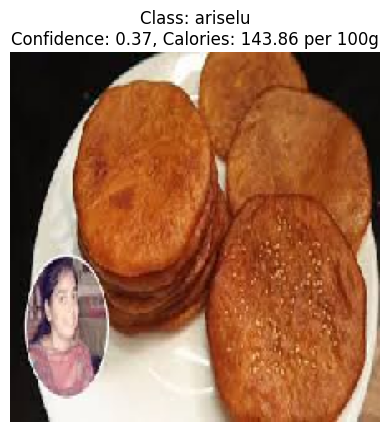

In [79]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure the image is in shape (224, 224, 3)
image = X_test[78]

# Add batch dimension: (224, 224, 3) → (1, 224, 224, 3)
input_image = np.expand_dims(image, axis=0)

# Predict
prediction = model.predict(input_image)

# Get index of the class with the highest probability
predicted_index = np.argmax(prediction)

# Get class name
predicted_class = class_names[predicted_index]

# Confidence score
confidence = prediction[0][predicted_index]

# Get calories
calories = food_calories.get(predicted_class, "Unknown")

# Display image and prediction
plt.imshow((image * 255).astype("uint8"))  # Convert image to uint8 if necessary
plt.axis('off')
plt.title(f"Class: {predicted_class}\nConfidence: {confidence:.2f}, Calories: {calories} per 100g")
plt.show()



In [68]:
# Assuming you have the predicted class index

predicted_class = class_names[predicted_index]  # e.g., 'Adhirasam'
calories = food_calories.get(predicted_class, "Calories not available")

print(f"The predicted food is {predicted_class}, and it has {calories} calories.")


The predicted food is bhindi_masala, and it has 169.59 calories.
